# 一、逻辑回归：二分类问题

## 案例1：学生考试是否通过

student-mat数据集记录了葡萄牙两所学校的数学课程的学生成绩。数据集包含多种特征，如学生的性别、年龄、家庭背景、学校支持等，可以用于预测学生的最终成绩或是否通过考试

In [38]:
import pandas as pd
# 加载数据集
pd.read_csv('datasets/student-mat.csv', sep=';')
# 一个单元格里面所有变量都会输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [19]:
# 数据预处理：从student-mat.csv文件加载数据，并为数据集添加一个新列passed，其中passed = 1表示学生通过考试（即G3 >= 10），passed = 0表示未通过。选择studytime, failures, absences, G1, G2作为特征变量。
# 2、特征标准化：使用StandardScaler对选定的特征进行标准化处理。
# 3、模型训练与评估：使用LogisticRegression模型在训练数据上进行拟合。在测试集上进行预测，并计算模型的分类正确率以及输出分类报告（包括精确率、召回率、F1分数等指标）。

#导入库
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression   #逻辑回归
from sklearn.model_selection import train_test_split #划分训练集和测试集
from sklearn.metrics import accuracy_score, classification_report    #正确率、分类报告（精确率、召回率、F1 分数等）
from sklearn.preprocessing import StandardScaler       #数据标准化

# 加载数据集
df = pd.read_csv('datasets/student-mat.csv', sep=';')
df.head()

# 目标变量：将 G3（最终成绩）作为是否通过考试的指标（假设 G3 >= 10 表示通过）
df['passed']=np.where(df['G3']>=10,1,0)  #条件为真返回第二个，假返回第三个
df.head()
y=df['passed']
x=df[['studytime', 'failures', 'absences', 'G1', 'G2']]
x

#数据标准化
scaler=StandardScaler()
x=scaler.fit_transform(x)  #fit_transform是在数据标准化的内容
x.shape

#训练集划分
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

#模型训练
clf=LogisticRegression().fit(x_train,y_train)
#模型预测
y_pre=clf.predict(x_test)
y_pre.shape

#模型评价：正确率、精确率、召回率、F1值、支持率
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
report=classification_report(y_test,y_pre)
print("-----------------------逻辑回归---------------------------\n\
分类的正确率为：{:.2f}%\n".format(acc*100))
print("分类报告（精确率、召回率、F1 分数等）为：")
print(report)

-----------------------逻辑回归---------------------------
分类的正确率为：91.14%

分类报告（精确率、召回率、F1 分数等）为：
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.98      0.88      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.92      0.91      0.91        79



### 思考题：同样是分类，SGDClassifier和LogisticRegression，有什么区别

#### #请这里完成答案：
SGDClassifier：它是一个基于梯度下降（Stochastic Gradient Descent，SGD）的线性分类器。它通过最小化损失函数来拟合模型，通常使用 hinge loss 或 log loss（用于二分类和多分类问题）。

LogisticRegression：它是一个更传统的逻辑回归模型，通常使用闭式解（例如，通过最大似然估计和求解正规方程）来拟合模型。

## 案例2：乳腺癌诊断（二分类问题）

In [20]:
#导入库
from sklearn.linear_model import LogisticRegression   #逻辑回归
from sklearn.model_selection import train_test_split #划分训练集和测试集
from sklearn.metrics import accuracy_score, classification_report    #正确率、分类报告（精确率、召回率、F1 分数等）
from sklearn.preprocessing import StandardScaler       #数据标准化
from sklearn.datasets import load_breast_cancer         #导入乳腺癌数据集
# 读取数据集
data = load_breast_cancer()  
print(data.keys())
x = data.data  
y = data.target

#数据标准化
scaler=StandardScaler()
x=scaler.fit_transform(x)  #fit_transform是在数据标准化的内容
x.shape
#训练集划分
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

#模型训练
clf=LogisticRegression().fit(x_train,y_train)
#模型预测
y_pre=clf.predict(x_test)
y_pre.shape

#模型评价：正确率、精确率、召回率、F1值、支持率
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
report=classification_report(y_test,y_pre)
print("-----------------------逻辑回归---------------------------\n\
分类的正确率为：{:.2f}%\n".format(acc*100))
print("分类报告（精确率、召回率、F1 分数等）为：")
print(report)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
-----------------------逻辑回归---------------------------
分类的正确率为：97.37%

分类报告（精确率、召回率、F1 分数等）为：
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 二、逻辑回归：多分类问题

### 1. ovr策略——案例3：鸢尾花数据

In [35]:
#导入库
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler       #数据标准化
#读取数据集
iris=load_iris()
iris.keys()
x=iris['data']
y=iris['target']
x.shape
y.shape
np.unique(y)

#数据标准化
scaler=StandardScaler()
x=scaler.fit_transform(x)  #fit_transform是在数据标准化的内容
x.shape
#训练集划分
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

#模型训练
clf=LogisticRegression(max_iter=200).fit(x_train,y_train)
#模型预测
y_pre=clf.predict(x_test)
y_pre.shape

#模型评价：正确率、精确率、召回率、F1值、支持率
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
report=classification_report(y_test,y_pre)
print("-----------------------逻辑回归---------------------------\n\
分类的正确率为：{:.2f}%\n".format(acc*100))
print("分类报告（精确率、召回率、F1 分数等）为：")
print(report)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

(150, 4)

(150,)

array([0, 1, 2])

(150, 4)

(45,)

-----------------------逻辑回归---------------------------
分类的正确率为：97.78%

分类报告（精确率、召回率、F1 分数等）为：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## 2. Softmax—案例4：鸢尾花数据

LogisticRegression(multi_class=“multinomial”,solver=“lbfgs”, C=10, penalty=‘l2’， random_state=42)
* 使用softmax需要设置：multi_class=“multinomial”（多项式损失）。
* 支持 Softmax回归的求解器：lbfgs、sag、saga、newton-cg求解器。
* 一般情况，使用Softmax回归要比默认的OvR效果要好。
* penalty : {'l1', 'l2', 'elasticnet', None}, default='l2'
   
   'liblinear'：支持 'l1' 和 'l2' 正则化。
   
  'lbfgs'、'newton-cg'、'newton-cholesky'、'sag'：支持 'l2' 正则化。
  
   'saga'：支持 'elasticnet'、'l1'、'l2' 正则化。

In [69]:
#导入库
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#读取数据集
iris=load_iris()
x=iris['data']
y=iris['target']
# y

#数据标准化
scaler=StandardScaler()
x=scaler.fit_transform(x)  #fit_transform是在数据标准化的内容
x.shape
#训练集划分
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

#模型训练
clf=LogisticRegression(max_iter=200,C=10,multi_class='multinomial',solver='lbfgs',penalty='l2').fit(x_train,y_train)
#模型预测
y_pre=clf.predict(x_test)
y_pre.shape

#模型评价：正确率、精确率、召回率、F1值、支持率
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
report=classification_report(y_test,y_pre)
print("-----------------------逻辑回归---------------------------\n\
分类的正确率为：{:.2f}%\n".format(acc*100))
print("分类报告（精确率、召回率、F1 分数等）为：")
print(report)

-----------------------逻辑回归---------------------------
分类的正确率为：100.00%

分类报告（精确率、召回率、F1 分数等）为：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## 认识Digits数据集

Digits 数据集是一个包含手写数字图像的多类分类数据集，每个样本都是一个 8x8 像素的灰度图像，共有 1797 个样本。每个像素的值在 0 到 16 之间，表示不同的灰度级别。每个样本对应一个类别标签，表示手写的数字（0 到 9）。
具体描述：
* 样本数：1797
* 特征数：64（每个样本是 8x8 的图像）
* 类别数：10（数字 0 到 9）
* 特征类型：数值型（灰度值）

Data shape: (1797, 64)
Target shape: (1797,)
Number of classes: 10


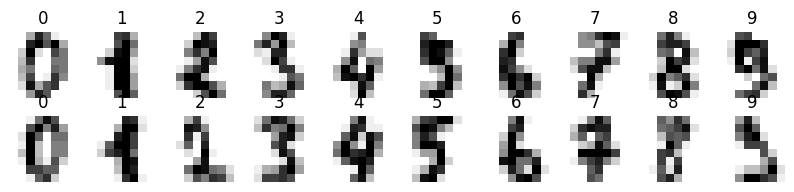

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# 加载 Digits 数据集
digits = load_digits()
X, y = digits.data, digits.target

# 打印数据集的基本信息
print(f"Data shape: {X.shape}")  # (1797, 64)
print(f"Target shape: {y.shape}")  # (1797,)
print(f"Number of classes: {len(np.unique(y))}")  # 10

# 可视化前 20 个样本
fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f'{label}')
    ax.axis('off')
plt.show()

## 三、作业
* 请使用 scikit-learn 提供的 Digits 数据集，训练一个逻辑回归模型对手写数字进行分类。具体要求如下：
1. 加载数据集：加载 Digits 数据集，并展示数据集的基本信息。
2. 数据预处理：对特征进行标准化处理。
3. 数据划分：将数据集划分为训练集和测试集，比例为 80%：20%。
4. 模型训练：使用逻辑回归模型（Softmax 回归）进行训练。
5. 模型评估：评估模型在测试集上的性能，包括计算准确率和分类报告。

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Data shape: (1797, 64)
Target shape: (1797,)
Number of classes: 10


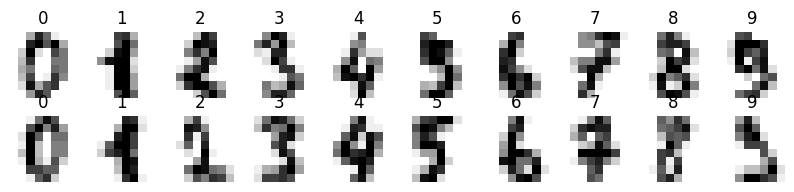

-----------------------逻辑回归---------------------------
分类的正确率为：94.44%

分类报告（精确率、召回率、F1 分数等）为：
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.86      0.89      0.88        28
           2       0.97      1.00      0.99        33
           3       1.00      0.94      0.97        34
           4       1.00      0.98      0.99        46
           5       0.95      0.89      0.92        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.90      0.90      0.90        30
           9       0.84      0.90      0.87        40

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import Normalizer

# 加载 Digits 数据集
digits = load_digits()
print(digits.keys())
x, y = digits.data, digits.target
# 打印数据集的基本信息
print(f"Data shape: {x.shape}")  # (1797, 64)
print(f"Target shape: {y.shape}")  # (1797,)
print(f"Number of classes: {len(np.unique(y))}")  # 10
# 可视化前 20 个样本
fig, axes = plt.subplots(2, 10, figsize=(10, 2))
for ax, image, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f'{label}')
    ax.axis('off')
plt.show()

#数据标准化
scaler=Normalizer(norm='l2')
x=scaler.fit_transform(x)  #fit_transform是在数据标准化的内容
x.shape
#训练集划分
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

#模型训练
clf=LogisticRegression(max_iter=200,multi_class='multinomial',solver='lbfgs',penalty='l2').fit(x_train,y_train)
#模型预测
y_pre=clf.predict(x_test)
y_pre.shape

#模型评价：正确率、精确率、召回率、F1值、支持率
acc=accuracy_score(y_test,y_pre)  #左边真实，右边预测
report=classification_report(y_test,y_pre)
print("-----------------------逻辑回归---------------------------\n\
分类的正确率为：{:.2f}%\n".format(acc*100))
print("分类报告（精确率、召回率、F1 分数等）为：")
print(report)

## 其他方法：随机梯度下降法分类、随机森林

In [47]:
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier  #线性模型
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
print(iris.keys())
x = iris.data
y = iris.target
x.shape,y.shape

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sgd = SGDClassifier().fit(x_train,y_train)
y_pre = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pre)
print("分类正确率为：{:.2f}%".format(accuracy*100))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
分类正确率为：53.33%


In [49]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier  #线性模型
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = load_iris()
print(iris.keys())
x = iris.data
y = iris.target
x.shape,y.shape

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
sgd = RandomForestClassifier().fit(x_train,y_train)
y_pre = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pre)
print("分类正确率为：{:.2f}%".format(accuracy*100))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
分类正确率为：97.78%
